FTCS l2 error norm =  0.02340576783852749
FTCS linf error norm =  0.02570298678470856
FTBS l2 error norm =  0.07088674983845987
FTBS linf error norm =  0.06547907314178925
CTCS l2 error norm =  0.009943727883586459
CTCS linf error norm =  0.012444946479225448
BTCS l2 error norm =  0.021193210139995436
BTCS linf error norm =  0.02149305883225431
lax l2 error norm =  0.009586390698499038
lax linf error norm =  0.011781955699792967
FTCS l2 error norm SW =  0.6098189793570529
FTCS linf error norm SW =  1.0061294960497924
FTBS l2 error norm SW=  0.5823491759910583
FTBS linf error norm SW=  0.9430567900897049
CTCS l2 error norm SW=  0.603275087340102
CTCS linf error norm SW=  0.99167506150353
BTCS l2 error norm SW=  0.5972111160168533
BTCS linf error norm SW=  0.97851238626723
lax l2 error norm SW=  0.6030353549662126
lax linf error norm SW=  0.9908131036497663
press return to save file and continue


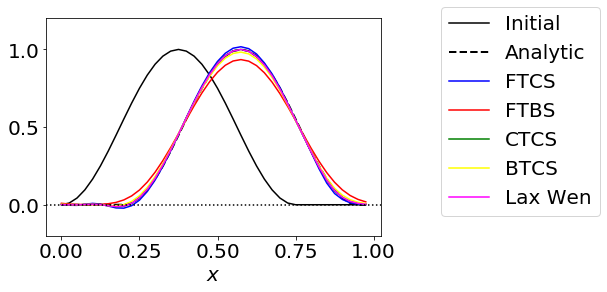

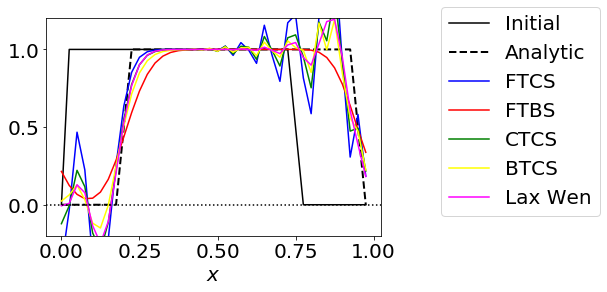

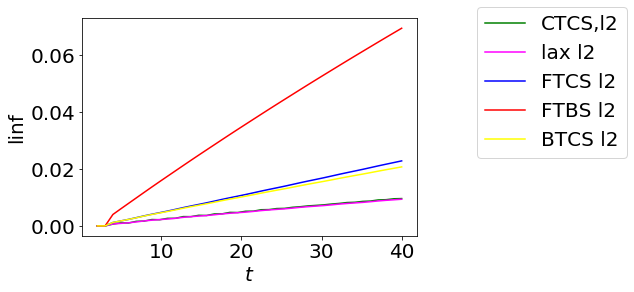

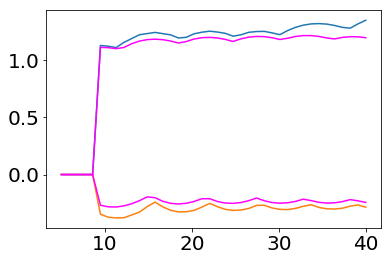

In [51]:
#!/usr/bin/python3

# Outer code for setting up the linear advection problem on a uniform
# grid and calling the function to perform the linear advection and plot.

### The command at the top means that this python function can be  ###
### run directly from the command line (you will also need to do   ###
### "chmod u+x linearAdvect.py" in unix or linux and then execute: ###
### ./linearAdvect.py                                              ###

import matplotlib.pyplot as plt

# read in all the linear advection schemes, initial conditions and other
# code associated with this application
from initialConditions import * 
from advectionSchemes import *
from diagnostics import *
# The main code is inside a function to avoid global variables
def main():
    "Advect the initial conditions using various advection schemes and"
    "compare results"

    # Parameters
    xmin = 0
    xmax = 1
    nx = 40
    nt = 40
    c = 0.2
# ftbs is stable for c between 0 and 1

    # Derived parameters
    dx = (xmax - xmin)/nx

    # spatial points for plotting and for defining initial conditions
    x = np.arange(xmin, xmax, dx)

    # Initial conditions
    phiOld = cosBell(x, 0, 0.75)
    phiOldsw= squareWave(x, 0, 0.75)
    # Exact solution is the initial condition shifted around the domain
    phiAnalytic = cosBell((x - c*nt*dx)%(xmax - xmin), 0, 0.75)
    phiAnalyticsw = squareWave((x - c*nt*dx)%(xmax - xmin), 0, 0.75)
    # Advect the cosbell profile using finite difference for all the time steps
    phiFTCS = FTCS(phiOld.copy(), c, nt)
    phiFTBS = FTBS(phiOld.copy(), c, nt)
    phiCTCS = CTCS(phiOld.copy(), c, nt)
    phiBTCS = BTCS(phiOld.copy(), c, nt)
    philax= lax(phiOld.copy(), c, nt)
    # Advect the square wave profile
    phiFTCSsw = FTCS(phiOldsw.copy(), c, nt)
    phiFTBSsw = FTBS(phiOldsw.copy(), c, nt)
    phiCTCSsw = CTCS(phiOldsw.copy(), c, nt)
    phiBTCSsw = BTCS(phiOldsw.copy(), c, nt)
    philaxsw= lax(phiOldsw.copy(), c, nt)
    # Calculate and print out error norms for the cosbell initial conditions
    print("FTCS l2 error norm = ", l2ErrorNorm(phiFTCS, phiAnalytic))
    print("FTCS linf error norm = ", lInfErrorNorm(phiFTCS, phiAnalytic))
    print("FTBS l2 error norm = ", l2ErrorNorm(phiFTBS, phiAnalytic))
    print("FTBS linf error norm = ", lInfErrorNorm(phiFTBS, phiAnalytic))
    print("CTCS l2 error norm = ", l2ErrorNorm(phiCTCS, phiAnalytic))
    print("CTCS linf error norm = ", lInfErrorNorm(phiCTCS, phiAnalytic))
    print("BTCS l2 error norm = ", l2ErrorNorm(phiBTCS, phiAnalytic))
    print("BTCS linf error norm = ", lInfErrorNorm(phiBTCS, phiAnalytic))
    print("lax l2 error norm = ", l2ErrorNorm(philax, phiAnalytic))
    print("lax linf error norm = ", lInfErrorNorm(philax, phiAnalytic))
    # Calculate and print out error norms for the square wave initial conditions
    print("FTCS l2 error norm SW = ", l2ErrorNorm(phiFTCS, phiAnalyticsw))
    print("FTCS linf error norm SW = ", lInfErrorNorm(phiFTCS, phiAnalyticsw))
    print("FTBS l2 error norm SW= ", l2ErrorNorm(phiFTBS, phiAnalyticsw))
    print("FTBS linf error norm SW= ", lInfErrorNorm(phiFTBS, phiAnalyticsw))
    print("CTCS l2 error norm SW= ", l2ErrorNorm(phiCTCS, phiAnalyticsw))
    print("CTCS linf error norm SW= ", lInfErrorNorm(phiCTCS, phiAnalyticsw))
    print("BTCS l2 error norm SW= ", l2ErrorNorm(phiBTCS, phiAnalyticsw))
    print("BTCS linf error norm SW= ", lInfErrorNorm(phiBTCS, phiAnalyticsw))
    print("lax l2 error norm SW= ", l2ErrorNorm(philax, phiAnalyticsw))
    print("lax linf error norm SW= ", lInfErrorNorm(philax, phiAnalyticsw))
    
    
    
    # find the error of schemes against time
    phiCTCSet=np.zeros(nt)
    philaxet=np.zeros(nt)
    phiBTCSet=np.zeros(nt)
    phiFTBSet=np.zeros(nt)
    phiFTCSet=np.zeros(nt)
    for i in range(2,nt):
        phiCTCSt = CTCS(phiOld.copy(), c, i)
        phiBTCSt = BTCS(phiOld.copy(), c, i)
        phiFTCSt = FTCS(phiOld.copy(), c, i)
        phiFTBSt = FTBS(phiOld.copy(), c, i)
        philaxt = lax(phiOld.copy(), c, i)
        phiAnalytict = cosBell((x - c*i*dx)%(xmax - xmin), 0, 0.75)
        phiCTCSet[i]=l2ErrorNorm(phiCTCSt, phiAnalytict)
        philaxet[i]=l2ErrorNorm(philaxt, phiAnalytict)
        phiBTCSet[i]=l2ErrorNorm(phiBTCSt, phiAnalytict)
        phiFTBSet[i]=l2ErrorNorm(phiFTBSt, phiAnalytict)
        phiFTCSet[i]=l2ErrorNorm(phiFTCSt, phiAnalytict)
        
    time=np.linspace(2,nt,nt)
    
   
        
        
    
    
    # Plot the solutions for the cosbell function
    font = {'size'   : 20}
    plt.rc('font', **font)
    plt.figure(1)
    plt.clf()
    plt.ion()
    plt.plot(x, phiOld, label='Initial', color='black')
    plt.plot(x, phiAnalytic, label='Analytic', color='black',
             linestyle='--', linewidth=2)
    plt.plot(x, phiFTCS, label='FTCS', color='blue')
    plt.plot(x, phiFTBS, label='FTBS', color='red')
    plt.plot(x, phiCTCS, label='CTCS', color='green')
    plt.plot(x, phiBTCS, label='BTCS', color='yellow')
    plt.plot(x, philax, label='Lax Wen', color='magenta')
    plt.axhline(0, linestyle=':', color='black')
    plt.ylim([-0.2,1.2])
    plt.legend(bbox_to_anchor=(1.15 , 1.1))
    plt.xlabel('$x$')
    plt.savefig('plots/cosbell.pdf', bbox_inches="tight")
    # Plot the solutions for the squarewave function
    fig=plt.figure(2)
    plt.clf()
    plt.ion()
    plt.plot(x, phiOldsw, label='Initial', color='black')
    plt.plot(x, phiAnalyticsw, label='Analytic', color='black',
             linestyle='--', linewidth=2)
    plt.plot(x, phiFTCSsw, label='FTCS', color='blue')
    plt.plot(x, phiFTBSsw, label='FTBS', color='red')
    plt.plot(x, phiCTCSsw, label='CTCS', color='green')
    plt.plot(x, phiBTCSsw, label='BTCS', color='yellow')
    plt.plot(x, philaxsw, label='Lax Wen', color='magenta')
    plt.axhline(0, linestyle=':', color='black')
    plt.ylim([-0.2,1.2])
    plt.legend(bbox_to_anchor=(1.15 , 1.1))
    plt.xlabel('$x$')
    plt.savefig('plots/square.pdf', bbox_inches="tight")
    # plot the error of schemes against time
    plt.figure(3)
    plt.plot(time, phiCTCSet, label='CTCS,l2', color='green')
    plt.plot(time, philaxet, label='lax l2', color='magenta')
    plt.plot(time, phiFTCSet, label='FTCS l2', color='blue')
    plt.plot(time, phiFTBSet, label='FTBS l2', color='red')
    plt.plot(time, phiBTCSet, label='BTCS l2', color='yellow')
    plt.legend(bbox_to_anchor=(1.15 , 1.1))
    plt.xlabel('$t$')
    plt.ylabel('linf')
    plt.savefig('plots/error.pdf', bbox_inches="tight")
    #boundedness of lax and ctcs
    phibound=np.zeros((nt,2))
    phiboundl=np.zeros((nt,2))
    for i in range(5,nt):
        phiCTCSt = CTCS(phiOldsw.copy(), c, i)
        philaxt = lax(phiOldsw.copy(), c, i)
        phibound[i,:]=[max(phiCTCSt),min(phiCTCSt)]
        phiboundl[i,:]=[max(philaxt),min(philaxt)]
    
    plt.figure(4)
    time2=np.linspace(5,nt,nt)
    plt.plot(time2,phibound[:,0])
    plt.plot(time2,phibound[:,1])
    plt.plot(time2,phiboundl[:,0], color='magenta')
    plt.plot(time2,phiboundl[:,1], color='magenta')
    
    input('press return to save file and continue')
    
    
    
    plt.show()

main()

